In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Build a Data Frame in Pandas

In [2]:
# Define date range
start_date = '2021-07-12'
end_date = '2022-07-11'
dates = pd.date_range(start_date, end_date)

# Create an empty data frame
df = pd.DataFrame(index=dates)

# Read SPY data into temp data frame
dfspy = pd.read_csv('D:/Temp/Stock Data/NYSE/SPY.csv', index_col= 'Date', parse_dates= True, usecols=['Adj Close', 'Date'])

# Rename Adj Close to SPY
dfspy = dfspy.rename(columns= {'Adj Close': 'SPY'})

# Join two data frames using DataFrame.join() ; how= 'inner' | 'outer' | 'left' | 'right' ; For Drop NaN Rows in df1
df = df.join(dfspy, how= 'inner')

# Read in more Stocks
symbols = ['GOOG', 'IBM', 'GLD']
for symbol in symbols:
    df_temp = pd.read_csv(f'D:/Temp/Stock Data/NYSE/{symbol}.csv', index_col= 'Date',
                          parse_dates= True, usecols= ['Adj Close', 'Date'])
    df_temp = df_temp.rename(columns= {'Adj Close': symbol})
    df = df.join(df_temp)


In [3]:
df.head(3)

,SPY,GOOG,IBM,GLD
2021-07-12,430.952728,2611.280029,128.314575,169.000000
2021-07-13,429.483612,2619.889893,127.731834,169.220001
2021-07-14,430.124481,2641.649902,127.312981,171.039993


### Slice a portion of a data frame

In [4]:
df1 = df['2021-07-12' : '2021-08-12'][['GOOG','GLD']] # '2021-07-12' to '2021-08-12'
df1.head(3)

,GOOG,GLD
2021-07-12,2611.280029,169.000000
2021-07-13,2619.889893,169.220001
2021-07-14,2641.649902,171.039993


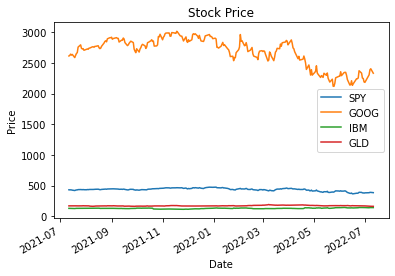

In [5]:
df.plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price')
plt.show()

### Normalize price data

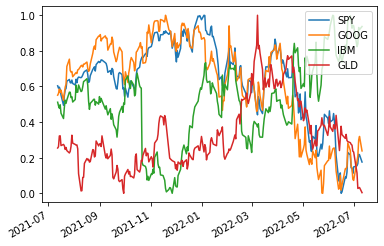

In [6]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.plot();

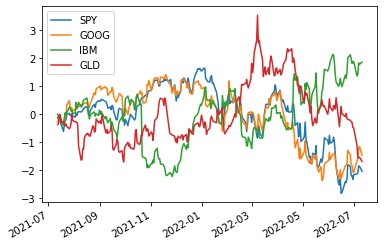

In [7]:
normalized_df2=(df-df.mean())/df.std()
normalized_df2.plot();

In [8]:
df.mean()

SPY      434.093647
GOOG    2678.468022
IBM      128.321724
GLD      171.173055
dtype: float64

In [9]:
df.std()

SPY      24.371906
GOOG    237.328648
IBM       6.827837
GLD       5.754600
dtype: float64

In [10]:
df.median()

SPY      437.626648
GOOG    2740.405029
IBM      128.592308
GLD      169.610001
dtype: float64

### bollinger bands

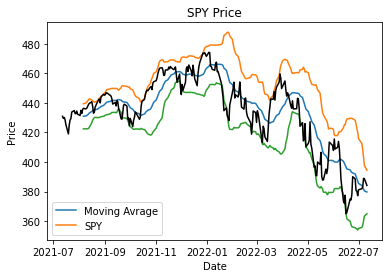

In [11]:
rm_spy = dfspy.rolling(20).mean()
rstd_spy = dfspy.rolling(20).std()
plt.plot(rm_spy)
plt.plot(rm_spy + (2 * rstd_spy))
plt.plot(rm_spy - (2 * rstd_spy))
plt.plot(dfspy, c = 'black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY Price')
plt.legend(["Moving Avrage", "SPY"])
plt.show()

### compute daily returns pandas

In [17]:
dr = df.pct_change()
dr.iloc[0 , :] = dr.iloc[0 , :].fillna(0)
dr.head(3)

,SPY,GOOG,IBM,GLD
2021-07-12,0.000000,0.000000,0.000000,0.000000
2021-07-13,-0.003409,0.003297,-0.004542,0.001302
2021-07-14,0.001492,0.008306,-0.003279,0.010755


In [13]:
dr.head()

,SPY,GOOG,IBM,GLD
2021-07-12,0.000000,0.000000,0.000000,0.000000
2021-07-13,-0.003409,0.003297,-0.004542,0.001302
2021-07-14,0.001492,0.008306,-0.003279,0.010755
2021-07-15,-0.003415,-0.006178,0.004506,0.000175
2021-07-16,-0.007844,0.004411,-0.011036,-0.009704


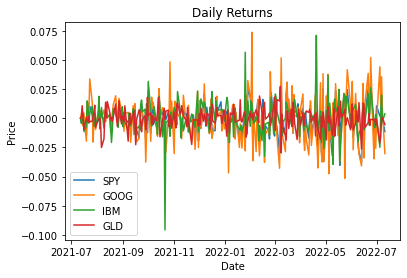

In [14]:
plt.plot(dr)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Returns')
plt.legend(['SPY', 'GOOG', 'IBM', 'GLD'])
plt.show()

In [15]:
df_SPY_GOOG = df[:][['SPY', 'GOOG']]
df_SPY_GOOG.head(3)

,SPY,GOOG
2021-07-12,430.952728,2611.280029
2021-07-13,429.483612,2619.889893
2021-07-14,430.124481,2641.649902


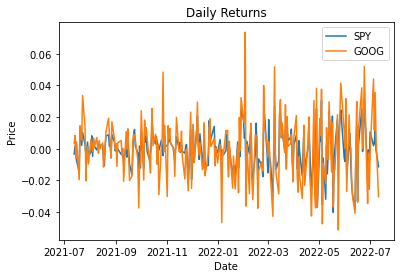

In [16]:
dr_SPY_GOOG = df_SPY_GOOG.pct_change()
plt.plot(dr_SPY_GOOG)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Returns')
plt.legend(['SPY', 'GOOG'])
plt.show()

### pandas cumulative return

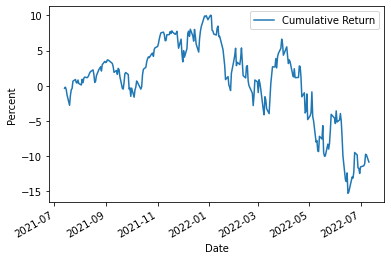

In [20]:
pct_change_spy = dfspy.pct_change()  
pct_change_spy_plus_one = cr_spy.add(1)
cumulative_return = pct_change_spy_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()
plt.ylabel('Percent')
plt.legend(['Cumulative Return'])
plt.show()